Accurancy = 0.83


<AxesSubplot:xlabel='Age', ylabel='Embarked'>

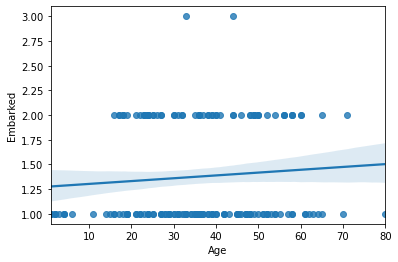

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

f= ("C:\\Users\\Mohamed\\titanic.csv")
data = pd.read_csv(f , delimiter = ";")
data.dropna(axis = 0, how = "any", thresh= None , inplace = True)
data.drop(["Cabin"], axis =1 , inplace = True)
data.drop(["Ticket"], axis =1 , inplace = True)
data.drop(["PassengerId"], axis =1 , inplace = True)
data["Family"] = data["SibSp"] + data["Parch"]
data.drop(["SibSp"], axis =1 , inplace = True)
data.drop(["Parch"], axis =1 , inplace = True)

clean1 = {"Sex": {"male":2 , "female" :1}}
clean2 = {"Embarked" : {"S":1 , "C":2 , "Q":3}}
data.replace(clean1 , inplace = True)
data.replace(clean2 , inplace = True)

x = data[['Sex','Age',"Embarked","Pclass"]]
y = data ["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x , y , test_size= 0.25 , random_state=30 )
logreg= LogisticRegression()
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)
print ("Accurancy = {:.2f}". format(logreg.score(x_test , y_test)))
sns.regplot(x="Age" , y= "Embarked" , data = data)




<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

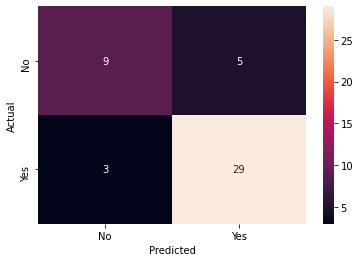

In [13]:
confusion_matrix = pd.crosstab(y_test,y_pred,rownames = ["Actual"] , colnames =["Predicted"])
sns.heatmap(confusion_matrix, annot = True)

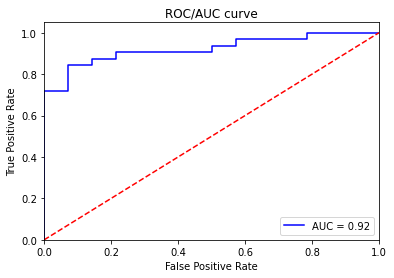

In [26]:
#AUC/ROC curve is the area under the curve of receiver characteristic operator
#the AUC/ROC curve It is a probability curve that plots the TPR against FPR at various threshold values 
#and essentially separates the ‘signal’ from the ‘noise’
import matplotlib.pyplot as plt

new_y_test = []
for val in y_test:
    if val == "Yes":
        new_y_test.append(1)
    else:
        new_y_test.append(0)
        
new_y_pred = []
for val in y_pred:
    if val == "Yes":
        new_y_pred.append(1)
    else:
        new_y_pred.append(0)
        
fpr, tpr, thresholds = metrics.roc_curve(new_y_test,logreg.predict_proba(x_test)[:,1] )
auc = metrics.roc_auc_score(new_y_test, logreg.predict_proba(x_test)[:,1])

plt.title("ROC/AUC curve")
plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc = 'lower right')